#Hardy Weinberg Equilibrium Calculations


##Hardy Weinberg Equilibrium Graph
- Drag the slider to set an allele frequency.
- Press play to calculate the expected genotype frequencies at Hardy Weinberg Equilibrium.

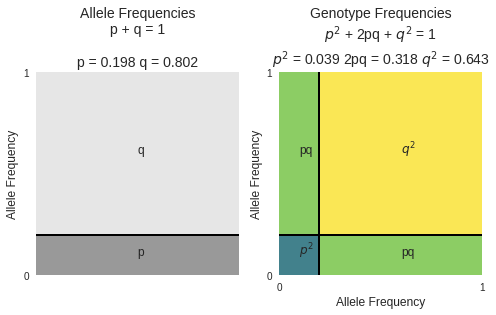

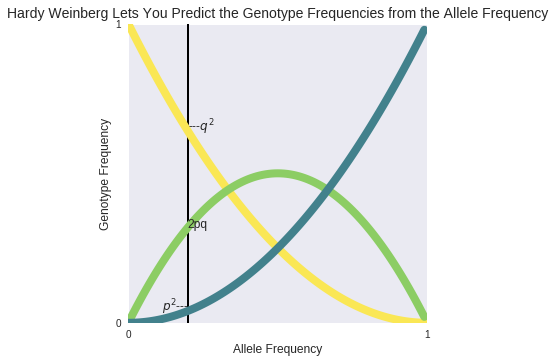

In [2]:
#@title Drag this slider to set the allele frequency: { run: "auto" }


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math


#Section 1 - Collect Allele Frequency

p = 0.198 #@param {type:"slider", min:0, max:1, step:0.001}
q = 1 - p

p_squared = p * p
q_squared = q * q
pq = p * q

#Section 2 - Graphs of Allele and Genotype Frequency

#setup multiple plots
fig, axs = plt.subplots(1, 2)

#text - plot titles
axs[0].set_title(("Allele Frequencies\np + q = 1\n\np = {0:.3f} q = {1:.3f}".format(p,q)), fontsize=14)
axs[1].set_title(("Genotype Frequencies\n$ p^2$ + 2pq + $q^2$ = 1\n$p^2$ = {0:.3f} 2pq = {1:.3f} $q^2$ = {2:.3f}".format(p_squared, (2 * pq ), q_squared)), fontsize=14)

#format - plot area
axs[0].axis ('scaled')              #note: sets axes to be equal size
axs[1].axis ('scaled')
axs[0].axis([0, 1, 0, 1])           #note: sets scale maximum and minimum
axs[1].axis([0, 1, 0, 1])


#format - subplot 0 axis ticks and labels
plt.sca(axs[0])                     #note: specify the correct plot to modify
plt.xticks([])                      #note: sets tick marks
plt.ylabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.yticks([0,1])

#format - subplot 0 rectangles
rectangle = plt.Rectangle((0, 0), 1, p, color='0.6')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((0, p), 1, q, color='0.9')
plt.gca().add_patch(rectangle)

#format - subplot 0 annotations
axs[0].plot([0, 1], [p, p], 'k-', lw=2)
axs[0].text(0.5, (p/2), "p")
axs[0].text(0.5, (1-q/2), "q")

#format - subplot 1 axis ticks and labels
plt.sca(axs[1])                     #note: specify the correct plot to modify
plt.xlabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.xticks([0,1])                   #note: sets tick marks
plt.ylabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.yticks([0,1])

#format - subplot 1 rectangles
rectangle = plt.Rectangle((p, p), -p, -p, color='#42818c')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), -p, q, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), q, -p, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), q, q, color='#fae755')
plt.gca().add_patch(rectangle)

#format - subplot 1 annotations
axs[1].plot([p, p], [0, 1], 'k-', lw=2)
axs[1].plot([0, 1], [p, p], 'k-', lw=2)
axs[1].text((p/2), (p/2), r'$p^2$')
axs[1].text((p/2), (1-q/2), "pq")
axs[1].text((1-q/2), (p/2), "pq")
axs[1].text((1-q/2), (1-q/2), r'$q^2$')


#Section 3 - Graphs of Allele and Genotype Frequency

#setup - single plot
fig2, axs = plt.subplots()

#text - format plot title
axs.set_title("Hardy Weinberg Lets You Predict the Genotype Frequencies from the Allele Frequency", fontsize = 14)

#format - plot area
axs.axis ('scaled')
axs.axis([0, 1, 0, 1])           #note: sets scale maximum and minimum

#format - axis ticks and labels
plt.sca(axs)                     #note: specify the correct plot to modify
plt.xlabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.xticks([0,1])                      #note: sets tick marks
plt.ylabel("Genotype Frequency", fontsize=12)      #note: set axis label
plt.yticks([0,1])

#format - annotations
axs.plot([p, p], [0, 1], 'k-', lw=2)
axs.text((p-0.085), (p_squared), r'$p^2$---')
axs.text((p), (2 * p * q), "2pq")
axs.text((p), (q_squared), r'---$q^2$')

#setup functions
xp = np.arange(0.0, 1.0, 0.01)     #note get an array of numbers from zero to one
xq = 1 - xp
y1 = xp**2
y2 = (2 * xp * xq)
y3 = xq**2

#plot functions
axs.plot(xp, y3, color='#fae755', lw = 8)
axs.plot(xp, y2, color='#8ccd64', lw = 8)
axs.plot(xp, y1, color='#42818c', lw = 8)

plt.show()


##Chi_Squared Test of Hardy Weinberg Equilibrium
- Enter the number of individuals with each genotype 
- Press play to calculate the expected genotype frequencies at Hardy Weinberg Equilibrium.

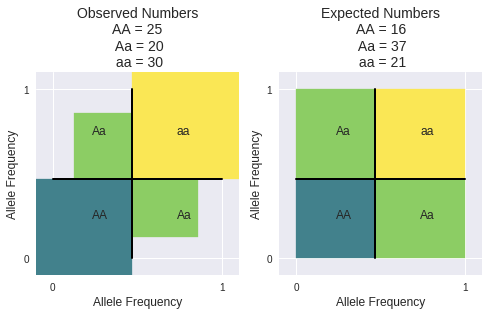

Allele Frequencies: p = 0.467, q = 0.533

The population IS NOT in Hardy Weinberg Equilibrium
chi^2 value = 16.167	P value = 0.000 (df = 1)


In [0]:
#@title Enter the number of individuals with each genotype {run: 'auto'}

import scipy.stats as stats
from matplotlib.patches import Rectangle


#Section 1 - Hardy Weinberg Equilibrium Calculations

#collect observed genotype numbers from user
AA = 25 #@param {type:"integer"}
Aa = 20 #@param {type:"integer"}
aa = 30 #@param {type:"integer"}

total = AA + Aa + aa
total_sqroot = math.sqrt(total)

#calculate allele frequencies
p = (AA + (Aa/2)) / total     #note: frequency of allele A
q = (aa + (Aa/2)) / total     #note: frequency of allele a

#calculate expected genotype frequencies
p_squared = (p * p)
TWOpq = (2 * p * q)
q_squared = (q * q)

#calculate expected genotype numbers in sample
AA_exp = p_squared * total
Aa_exp = TWOpq * total
aa_exp = q_squared * total

#print ("Observed Numbers: AA = {}, Aa = {}, aa = {}".format (AA,Aa,aa))
#print ("Expected Numbers: AA = {0:.3f}, Aa = {1:.3f}, aa = {2:.3f}".format (AA_exp,Aa_exp,aa_exp))


#Section 2 - Statistics

#chisquared - calculate scaled difference for each genotype
AA_dif = ((AA - AA_exp)**2) / AA_exp
Aa_dif = ((Aa - Aa_exp)**2) / Aa_exp
aa_dif = ((aa - aa_exp)**2) / aa_exp

#chisquared - sum differences for each genotype
chi_squ = AA_dif + Aa_dif + aa_dif

#print (AA_dif,Aa_dif,aa_dif)

#chisquared - calculate chisquared statistic
p_value = 1 - stats.chi2.cdf(x=chi_squ,df=1)  # Find the p-value


#Section 3 - Visuals

#calculate the sizes of observed and expected squares

#homozygous dominant
AA_obs_size = math.sqrt(AA)
AA_exp_size = math.sqrt(AA_exp)
AA_ratio = AA_obs_size/AA_exp_size

#homozygous recessive
aa_obs_size = math.sqrt(aa)
aa_exp_size = math.sqrt(aa_exp)
aa_ratio = aa_obs_size/aa_exp_size

#heterozygotes (note squares must be split in two for the plot)
Aa_obs_size = math.sqrt(Aa/2)
Aa_exp_size = math.sqrt(Aa_exp/2)
Aa_ratio = Aa_obs_size/Aa_exp_size


#Section 4 - Graphs

#setup multiple plots
fig, axs = plt.subplots(1, 2)

#text - plot titles
axs[0].set_title(("Observed Numbers\nAA = {}\n Aa = {}\n aa = {}".format(AA,Aa,aa)), fontsize=14)
axs[1].set_title(("Expected Numbers\nAA = {0:.0f}\n Aa = {1:.0f}\n aa = {2:.0f}".format(AA_exp,Aa_exp,aa_exp)), fontsize=14)

#format - plot area
axs[0].axis ('scaled')              #note: sets axes to be equal size
axs[0].axis([-0.1, 1.1, -0.1, 1.1]) #note: sets scale maximum and minimum
axs[1].axis ('scaled')              #note: sets axes to be equal size
axs[1].axis([-0.1, 1.1, -0.1, 1.1]) #note: sets scale maximum and minimum

#format - subplot 0 axis ticks and labels
plt.sca(axs[0])                     #note: specify the correct plot to modify
plt.xticks([0,1])                      #note: sets tick marks
plt.yticks([0,1])
plt.xlabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.ylabel("Allele Frequency", fontsize=12)      #note: set axis label

#format - subplot 0 rectangles
rectangle = plt.Rectangle((p, p), -AA_ratio * p, -AA_ratio * p, color='#42818c')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), -Aa_ratio * p, Aa_ratio * q, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), Aa_ratio * q, -Aa_ratio * p, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), aa_ratio * q, aa_ratio * q, color='#fae755')
plt.gca().add_patch(rectangle)


#format - subplot 0 lines
axs[0].plot([0, 1], [p, p], 'k-', lw=2)
axs[0].plot([p, p], [0, 1], 'k-', lw=2)

#format - subplot 1 axis ticks and labels
plt.sca(axs[1])                     #note: specify the correct plot to modify
plt.xticks([0,1])                   #note: sets tick marks
plt.yticks([0,1])
plt.xlabel("Allele Frequency", fontsize=12)      #note: set axis label
plt.ylabel("Allele Frequency", fontsize=12)      #note: set axis label


#format - subplot 1 rectangles
rectangle = plt.Rectangle((p, p), -p, -p, color='#42818c')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), -p, q, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), q, -p, color='#8ccd64')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((p, p), q, q, color='#fae755')
plt.gca().add_patch(rectangle)

#format - subplot 1 lines
axs[1].plot([p, p], [0, 1], 'k-', lw=2)
axs[1].plot([0, 1], [p, p], 'k-', lw=2)

#rectangles


#text annotations, show allele frequencies on plot
#axs[0].text(0.5, (p/2), "p = {0:.3f}".format (p))
#axs[0].text(0.5, (1-q/2), "q = {0:.3f}".format (q))
#axs[1].text((p/2), (p/2), r'$p^2$'"\n{0:.4f}".format (p*p))
#axs[1].text((p/2), (1-q/2), "pq\n{0:.4f}".format (p*q))
#axs[1].text((1-q/2), (p/2), "pq\n{0:.4f}".format (p*q))
#axs[1].text((1-q/2), (1-q/2), r'$q^2$'"\n{0:.4f}".format (q*q))

#text annotations, hide genotype frequencies on plot
axs[0].text((p/2), (p/2), "AA")
axs[0].text((p/2), (1-q/2), "Aa")
axs[0].text((1-q/2), (p/2), "Aa")
axs[0].text((1-q/2), (1-q/2), "aa")
axs[1].text((p/2), (p/2), "AA")
axs[1].text((p/2), (1-q/2), "Aa")
axs[1].text((1-q/2), (p/2), "Aa")
axs[1].text((1-q/2), (1-q/2), "aa")

plt.show()
                      

#output
print ("Allele Frequencies: p = {0:.3f}, q = {1:.3f}\n".format(p,q))

if p_value <= 0.05:
  print("The population IS NOT in Hardy Weinberg Equilibrium")
else:
  print("The population IS in Hardy Weinberg Equilibrium")

print ("chi^2 value = {0:.3f}\tP value = {1:.3f} (df = 1)".format(chi_squ, p_value))
